## Is it correct to fit a simple SIR to our model's equations?

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlrd
from scipy import stats
import matplotlib.cm as cm
import matplotlib.colors as mcolors

Simple SIR model:

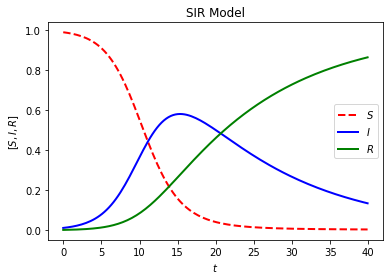

In [22]:
#Initial conditions and t range
t = np.arange(0,40, 0.3)
k0=[1 - 0.01, 0.01, 0] #normalized population

#Differential equation
eta = 0.5
gamma = 1/14
def f(k,t):
    S = k[0]
    I = k[1]
    R = k[2]
    dSdt = -1*eta*I*S
    dIdt = eta*I*S - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]


#Solve
k_s = odeint(f,k0,t)

#Plotting
plt.plot(t,k_s[:,0],'r--', linewidth=2.0)
plt.plot(t,k_s[:,1],'b-', linewidth=2.0)
plt.plot(t,k_s[:,2],'g-', linewidth=2.0)

#print(k[20, 0])
plt.title("SIR Model")    #'$\u03B2 =$ {}, $\gamma =$ {}'.format(eta, gamma))
plt.xlabel("$t$")
plt.ylabel("$[S, I, R]$")
plt.legend(["$S$","$I$", "$R$"])

# plt.savefig('sir.png', dpi = 1200)

Divied population with varios $\beta$ differentiation:

In [136]:
gamma = 1/14
delta = 1
betam = 7/14

def equations(k,t):
    betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

    ST, IT, RT = k[0], k[1], k[2]
    SM, IM, RM = k[3], k[4], k[5]
    SL, IL, RL = k[6], k[7], k[8]
    I = IT + IM + IL
    S = ST + SM + SL
    #top
    dSTdt = -1*betat*I*ST
    dITdt = betat*I*ST - gamma*IT
    dRTdt = gamma*IT
    #medium
    dSMdt = -1*betam*I*SM
    dIMdt = betam*I*SM - gamma*IM
    dRMdt = gamma*IM
    #low
    dSLdt = -1*betal*I*SL
    dILdt = betal*I*SL - gamma*IL
    dRLdt = gamma*IL
    
    return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]

In [137]:
#Initial conditions and t range
t  =  np.arange(0,130, 0.001)
k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]

#Solve
k = odeint(equations,k0,t)

Itot = k[:, 1]+k[:, 4]+k[:, 7]

In [166]:
def find_range(cases):
    begin = 0 
    end = np.size(cases)-1
    for i in range(1, end):
        if cases[i] != 0 and begin == 0:
            begin = i
        if begin != 0:
            if i <= 3: shift = 1
            else: shift = i - 3

            if cases[i] < np.average(cases[shift:i]):
                end = i
                break
    end = int(end/5)
    begin = int(end/20)
    return begin, end

Text(0.5, 1.0, 'Infected people in time')

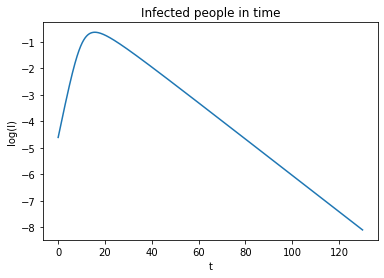

In [167]:
plt.plot(t, np.log(Itot))

plt.ylabel('log(I)')
plt.xlabel('t')
plt.title('Infected people in time')

In [168]:
find_range(Itot)

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(156, 3131)

In [169]:
def fit_equation(cases): 
    begin, end = find_range(cases)
    betaSgamma = np.polyfit(t[begin:end], np.log(list(cases[begin:end])), 1)[0] #should be corrected in the originial code
    return betaSgamma

Text(0.5, 1.0, 'Infected people in the fit range')

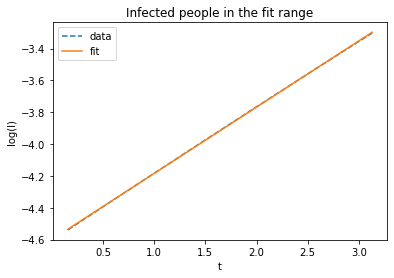

In [170]:
begin, end = find_range(Itot)
a, b = np.polyfit(t[begin:end], np.log(list(Itot[begin:end])), 1)

plt.plot(t[begin:end], np.log(list(Itot[begin:end])), '--', label = 'data')
plt.plot(t[begin:end], a * t[begin:end] + b, label = 'fit')

plt.legend()
plt.ylabel('log(I)')
plt.xlabel('t')
plt.title('Infected people in the fit range')

In [171]:
fit_equation(Itot)

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.41626814169036686

In [172]:
def find_beta(cases):
    population = 1
    return (fit_equation(cases) + gamma)/population

In [173]:
find_beta(Itot)

0.48769671311893825

In [174]:
eta = find_beta(Itot)
gamma = 1/14

def f(k,t):
    S = k[0]
    I = k[1]
    R = k[2]
    dSdt = -1*eta*I*S
    dIdt = eta*I*S - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]

k0 = [1-0.01, 0.01, 0]
k_s = odeint(f,k0,t)

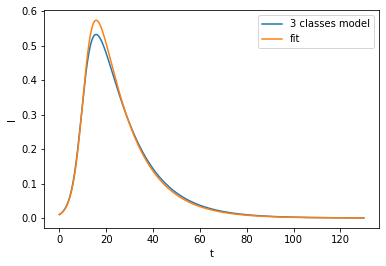

In [175]:
plt.plot(t, Itot, label = '3 classes model')
plt.plot(t, k_s[:, 1], label = 'fit')

plt.xlabel('t')
plt.ylabel('I')
plt.legend()

In [177]:
#linear plot in range of the fitted data
#Error 
#define least square and look for the best range for other parameters

error = sum((Itot - k_s[:, 1])**2)

error

13.279474328463293

In [101]:
gamma = 1/14
# t  =  np.arange(0,100, 0.05)
def find_error(betam, delta):
    def equations(k,t):
        betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

        ST, IT, RT = k[0], k[1], k[2]
        SM, IM, RM = k[3], k[4], k[5]
        SL, IL, RL = k[6], k[7], k[8]
        I = IT + IM + IL
        S = ST + SM + SL
        #top
        dSTdt = -1*betat*I*ST
        dITdt = betat*I*ST - gamma*IT
        dRTdt = gamma*IT
        #medium
        dSMdt = -1*betam*I*SM
        dIMdt = betam*I*SM - gamma*IM
        dRMdt = gamma*IM
        #low
        dSLdt = -1*betal*I*SL
        dILdt = betal*I*SL - gamma*IL
        dRLdt = gamma*IL

        return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]
    #Initial conditions and t range
    k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]
    #Solve
    k = odeint(equations,k0,t)
    Itot = k[:, 1]+k[:, 4]+k[:, 7]
    
    beta = find_beta(Itot)

    def SIR(k,t):
        S = k[0]
        I = k[1]
        R = k[2]
        dSdt = -1*beta*I*S
        dIdt = beta*I*S - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]

    k0 = [1-0.01, 0.01, 0]
    k_s = odeint(SIR,k0,t)
    
    return sum((Itot - k_s[:, 1])**2)

In [130]:
find_error(0.1, 0)

2.6002226190527074

In [124]:
0.5/14

0.03571428571428571

In [103]:
%%time

delta_range = np.arange(0, 1, 0.05)
betam_range = np.arange(0.1, 1.2, 0.05)

error = []
for delta in delta_range:
    for betam in betam_range:
        error.append(find_error(betam, delta))

error

Wall time: 3min 51s


[3.756067816408807,
 8.998683534715259,
 10.87135424192814,
 11.269466575730549,
 11.122343547576111,
 10.753120326688395,
 10.305503729656815,
 9.844707256932583,
 9.399589520360683,
 8.979412935683857,
 8.594663662527406,
 8.239484024544133,
 7.909966242109889,
 7.612316425565825,
 7.338105007392644,
 7.083821357553481,
 6.8552549800901845,
 6.639388132494325,
 6.433681356986206,
 6.249252284442583,
 6.075989980273714,
 5.918212691565911,
 3.7441812517771025,
 8.973013765641912,
 10.836733862181248,
 11.230608304509643,
 11.08012946777502,
 10.709183157220263,
 10.261333870130926,
 9.80548171381924,
 9.361741315735305,
 8.94319618272037,
 8.554726327160848,
 8.201028826119911,
 7.8789392915469785,
 7.576758723160393,
 7.303917864837075,
 7.057488003279937,
 6.8234979136154505,
 6.608775567435462,
 6.411289450423963,
 6.228022809203797,
 6.055858923449638,
 5.891488212939401,
 3.7089885174387236,
 8.89712088246378,
 10.739773053169545,
 11.116194337518063,
 10.958049337688394,
 10.582

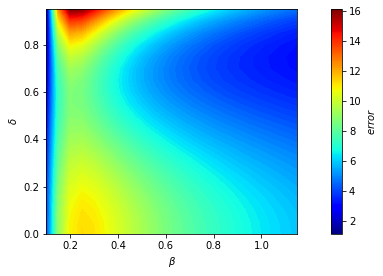

In [106]:
plt.contourf(betam_range, delta_range, Error, 100, cmap = cm.jet)

plt.ylabel('$\delta$')
plt.xlabel('$\u03B2$')

normalize = mcolors.Normalize(vmin=np.min(error), vmax=np.max(error))
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(error)
plt.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = None 
cbar = plt.colorbar(scalarmappaple, orientation="vertical", pad=0.1, cax=cbar_ax) 
cbar.set_label('$error$')


In [116]:
%%time

delta_range = np.arange(0, 0.3, 0.05)
betam_range = np.arange(0.5, 3, 0.1)/14

error = []
for delta in delta_range:
    for betam in betam_range:
        error.append(find_error(betam, delta))

TypeError: expected non-empty vector for x

NameError: name 'fig' is not defined

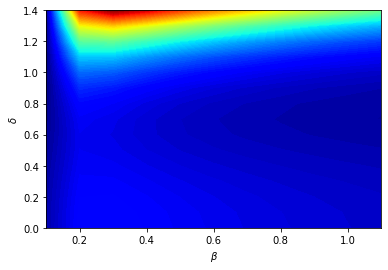

In [108]:
error = np.array(error)
Error = error.reshape(len(delta_range), len(betam_range))

plt.contourf(betam_range, delta_range, Error, 100, cmap = cm.jet)


plt.ylabel('$\delta$')
plt.xlabel('$\u03B2$')


normalize = mcolors.Normalize(vmin=np.min(error), vmax=np.max(error))
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(error)
plt.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = None 
cbar = plt.colorbar(scalarmappaple, orientation="vertical", pad=0.1, cax=cbar_ax) 
cbar.set_label('$error$')

In [111]:
gamma = 1/14

def diff_plot(betam, delta):
    def equations(k,t):
        betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

        ST, IT, RT = k[0], k[1], k[2]
        SM, IM, RM = k[3], k[4], k[5]
        SL, IL, RL = k[6], k[7], k[8]
        I = IT + IM + IL
        S = ST + SM + SL
        #top
        dSTdt = -1*betat*I*ST
        dITdt = betat*I*ST - gamma*IT
        dRTdt = gamma*IT
        #medium
        dSMdt = -1*betam*I*SM
        dIMdt = betam*I*SM - gamma*IM
        dRMdt = gamma*IM
        #low
        dSLdt = -1*betal*I*SL
        dILdt = betal*I*SL - gamma*IL
        dRLdt = gamma*IL

        return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]
    #Initial conditions
    k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]
    #Solve
    k = odeint(equations,k0,t)
    Itot = k[:, 1]+k[:, 4]+k[:, 7]
    
    beta = find_beta(Itot)

    def SIR(k,t):
        S = k[0]
        I = k[1]
        R = k[2]
        dSdt = -1*beta*I*S
        dIdt = beta*I*S - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]

    k0 = [1-0.01, 0.01, 0]
    k_s = odeint(SIR,k0,t)
    
    plt.plot(t, Itot, label = '3 classes model')
    plt.plot(t, k_s[:, 1], label = 'fit')

    plt.xlabel('t')
    plt.ylabel('I')
    plt.legend()



C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


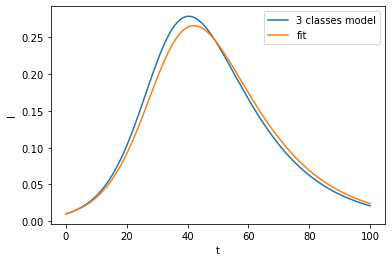

In [113]:
delta = 0
betam = 0.2
t  =  np.arange(0,100, 0.001)
diff_plot(betam, delta)

In [109]:
%%time

delta_range = np.arange(0, 0.1, 0.01)
betam_range = np.arange(0.1, 1.2, 0.05)

error = []
for delta in delta_range:
    for betam in betam_range:
        error.append(find_error(betam, delta))

error

Wall time: 2min


[3.756067816408807,
 8.998683534715259,
 10.87135424192814,
 11.269466575730549,
 11.122343547576111,
 10.753120326688395,
 10.305503729656815,
 9.844707256932583,
 9.399589520360683,
 8.979412935683857,
 8.594663662527406,
 8.239484024544133,
 7.909966242109889,
 7.612316425565825,
 7.338105007392644,
 7.083821357553481,
 6.8552549800901845,
 6.639388132494325,
 6.433681356986206,
 6.249252284442583,
 6.075989980273714,
 5.918212691565911,
 3.7556282991850396,
 8.997692383469882,
 10.870035211229046,
 11.267914903032885,
 11.120649857652618,
 10.751356066236745,
 10.303796946744125,
 9.842955036684945,
 9.39787867279858,
 8.97775287938196,
 8.593061746664214,
 8.237941702708877,
 7.908482294607005,
 7.610889416894827,
 7.336731979494296,
 7.0824965693045705,
 6.853985677479331,
 6.638160587654785,
 6.432496449550371,
 6.248110004811891,
 6.082354227209714,
 5.917138976083814,
 3.7543097312825258,
 8.994718565581838,
 10.864288428427757,
 11.263262537856995,
 11.115571586139195,
 10.74

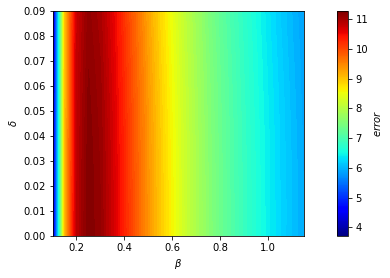

In [110]:
error = np.array(error)
Error = error.reshape(len(delta_range), len(betam_range))

plt.contourf(betam_range, delta_range, Error, 100, cmap = cm.jet)


plt.ylabel('$\delta$')
plt.xlabel('$\u03B2$')


normalize = mcolors.Normalize(vmin=np.min(error), vmax=np.max(error))
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(error)
plt.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = None 
cbar = plt.colorbar(scalarmappaple, orientation="vertical", pad=0.1, cax=cbar_ax) 
cbar.set_label('$error$')